In [ ]:
import cv2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
img_path = "lena_forsen.jpg"

In [ ]:
img = cv2.imread(img_path,1)

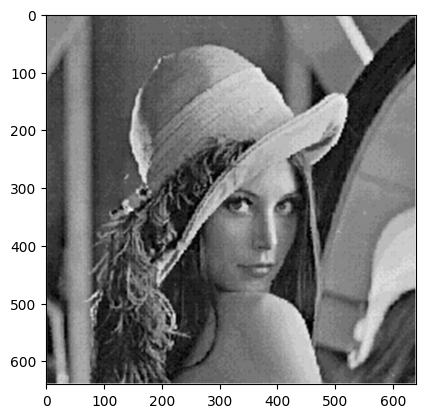

In [ ]:
plt.imshow(img)

In [ ]:
def show_subplot(img1,img2,title1,title2):
    fig = plt.figure(figsize=(10,7))
    fig.add_subplot(2,2,1)
    plt.imshow(img1)
    plt.axis('off')
    plt.title(title1)
    fig.add_subplot(2,2,2)
    plt.imshow(img2)
    plt.axis('off')
    plt.title(title2)

In [ ]:
c = 255/np.log(1+np.max(img))

In [ ]:
print(c)

45.98590442833571


In [ ]:
def log_trans(image,c):
    if np.max(image)==0:
        return image
    c = 255/np.log(1+np.max(image))

    new = c*(np.log(image+1))
    new = np.array(new,dtype=np.uint8)
    show_subplot(image,new,"original image","Image after log transformation")

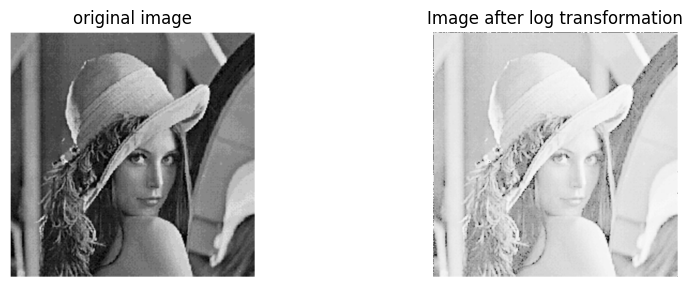

In [ ]:
log_trans(img,c)

In [ ]:
def power_trans(image,g=2.9):
    m = image/255
    k = (m**g*255).astype(np.uint8)
    show_subplot(image,m,"Original image","After power transformation")

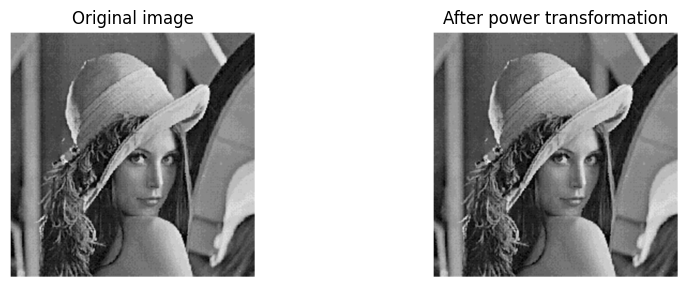

In [ ]:
power_trans(img)

In [ ]:
def contrast_stretching(image):
    mini = np.min(image)
    maxi = np.max(image)
    gh = (image-mini)*(255/maxi-mini)
    result = gh.astype(np.uint8)
    show_subplot(image,result,"original image","Contrast stretching of image")

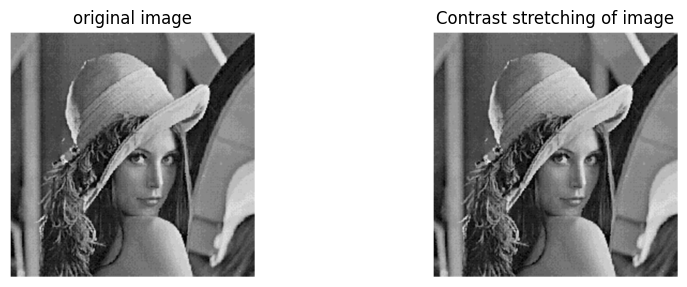

In [ ]:
contrast_stretching(img)

In [ ]:
img.shape

(640, 640, 3)

In [ ]:
img_path = "grey_bird.jpg"
grey_guy = cv2.imread(img_path,1)

In [ ]:
grey_guy.shape

(478, 717, 3)

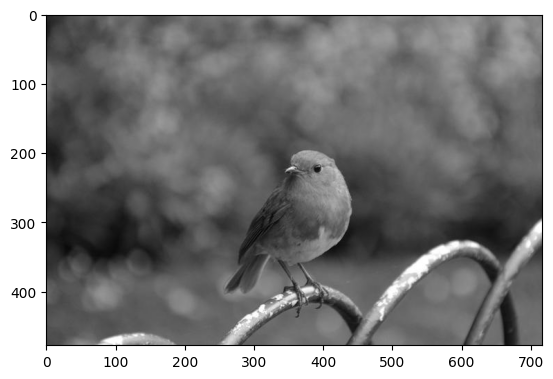

In [ ]:
plt.imshow(grey_guy)

In [ ]:
img3 = cv2.cvtColor(grey_guy,cv2.IMREAD_GRAYSCALE)

In [ ]:
img3.shape

(478, 717, 4)

In [ ]:
mini = np.min(img3)
mini

0

In [ ]:
maxi = np.max(img3)
maxi

255

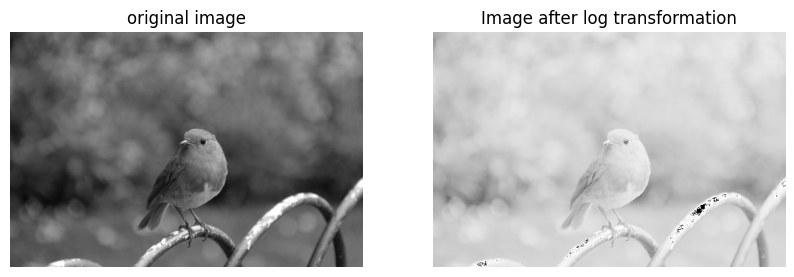

In [ ]:
log_trans(grey_guy,c=75)

In [ ]:
def contrast_st(image,r1,r2,s1,s2):
    mini = np.min(image)
    maxi = np.max(image)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.astype(float)
    slope1 = s1/r1
    slope2 = (s2 - s1) / (r2 - r1)
    slope3 = 255-s2/255-r2
    r1, r2, s1, s2 = 50, 150, 0, 255
    h,w = image.shape
    result = np.zeros_like(image)
    for i in range(h):
        for j in range(w):
            p = image[i,j]
            if p < r1:
                result[i,j] = s1*p/r1
            elif p > r2:
                result[i,j]=s2+slope3*(p-r2)
            else:
                result[i,j]=s1+slope2*(p-r1)
    result = np.clip(result, 0, 255).astype(np.uint8)
    show_subplot(image,result,"Original image","Contrast stretching of colors")

In [ ]:
v =cv2.imread("grey_bird.jpg",1)

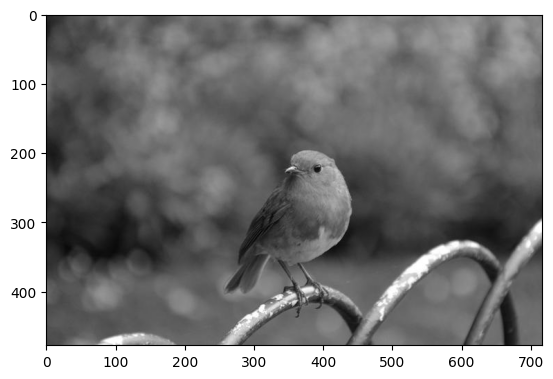

In [ ]:
plt.imshow(v)

In [ ]:
def contrast_st(image, r1, r2, s1, s2):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype(float)
    slope1 = s1 / r1
    slope2 = (s2 - s1) / (r2 - r1)
    slope3 = (255 - s2) / (255 - r2)
    h, w = image.shape
    result = np.zeros_like(image)
    for i in range(h):
        for j in range(w):
            p = image[i, j]
            if p < r1:
                result[i, j] = s1 * p / r1
            elif p > r2:
                result[i, j] = s2 + slope3 * (p - r2)
            else:
                result[i, j] = s1 + slope2 * (p - r1)
    result = np.clip(result, 0, 255).astype(np.uint8)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Contrast Stretched Image")
    plt.imshow(result, cmap='gray')
    plt.show()
    return result

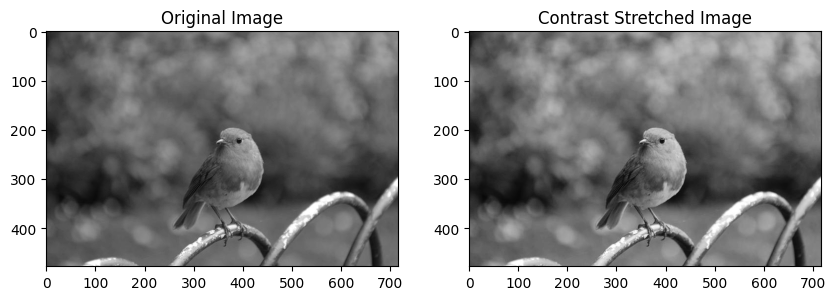

array([[ 37,  37,  39, ..., 154, 152, 152],
       [ 37,  37,  39, ..., 154, 154, 152],
       [ 37,  37,  37, ..., 155, 154, 152],
       ...,
       [ 84,  83,  83, ..., 134, 134, 134],
       [ 84,  83,  83, ..., 134, 134, 134],
       [ 84,  83,  83, ..., 134, 134, 134]], dtype=uint8)
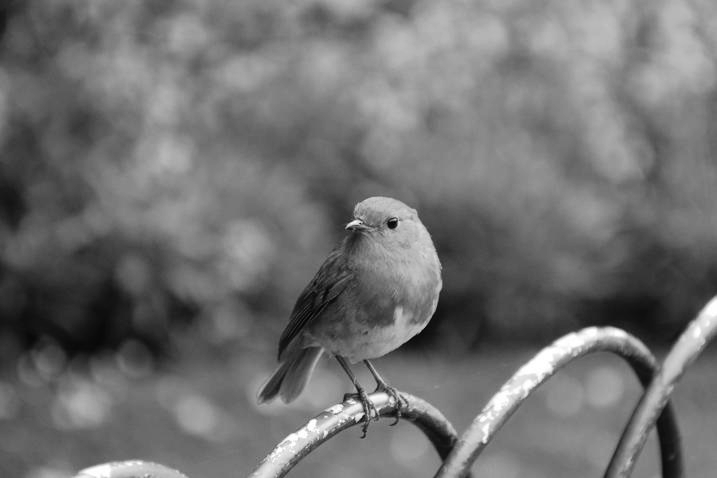

In [ ]:
contrast_st(v ,30, 150, 25, 180)

(630, 952, 3)

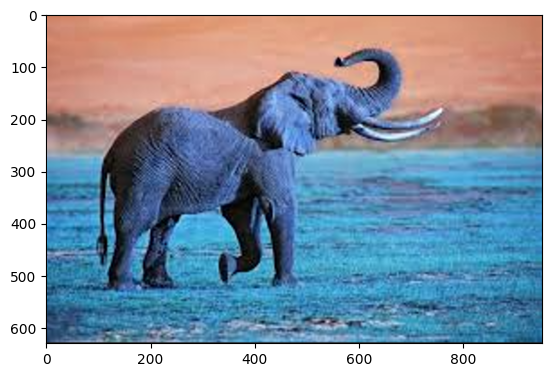

In [ ]:
img_path1 = "elephant.png"
elephant = cv2.imread(img_path1,1)
plt.imshow(elephant)
elephant.shape

In [ ]:
def contrast_st_color(image,r1,r2,s1,s2):
    mini = np.min(image)
    maxi = np.max(image)
    if len(image.shape) == 3:
        image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    image = image.astype(float)
    slope2 = (s2 - s1) / (r2 - r1)
    slope1 = s1/r1
    slope3 = 255-s2/255-r2
    r1, r2, s1, s2 = 50, 150, 0, 255
    h, w, c = image.shape
    result = np.zeros_like(image)
    for k in range(c): # channels
        for i in range(h):
            for j in range(w):
                p = image[i, j, k]
                if p < r1:
                    result[i, j, k] = s1 * p / r1
                elif p > r2:
                    result[i, j, k] = s2 + slope3 * (p - r2)
                else:
                    result[i, j, k] = s1 + slope2 * (p - r1)
    result = np.clip(result, 0, 255).astype(np.uint8)
    show_subplot(image,result,"Original image","Contrat stretching image")

In [ ]:
def contrast_st_color(image, r1, r2, s1, s2):
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("The image must have 3 channels (RGB).")

    image = image.astype(float)
    slope2 = (s2 - s1) / (r2 - r1)
    slope3 = (255 - s2) / (255 - r2)

    h, w, c = image.shape
    result = np.zeros_like(image)

    for k in range(c):  # channel
        channel = image[:, :, k]
        result_channel = np.zeros_like(channel)
        for i in range(h):
            for j in range(w):
                p = channel[i, j]
                if p < r1:
                    result_channel[i, j] = s1 * p / r1
                elif p > r2:
                    result_channel[i, j] = s2 + slope3 * (p - r2)
                else:
                    result_channel[i, j] = s1 + slope2 * (p - r1)
        result[:, :, k] = np.clip(result_channel, 0, 255).astype(np.uint8)

    image_display = np.clip(image, 0, 255).astype(np.uint8)
    result_display = np.clip(result, 0, 255).astype(np.uint8)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image_display, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title("Contrast Stretched Image")
    plt.imshow(cv2.cvtColor(result_display, cv2.COLOR_BGR2RGB))
    plt.show()

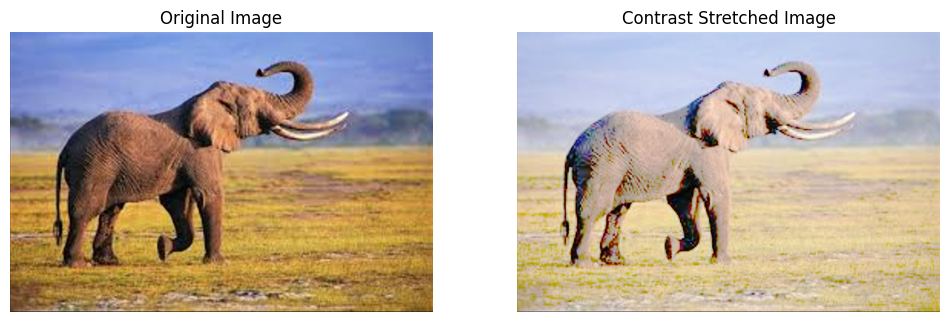

In [ ]:
contrast_st_color(elephant,23,50,25,150)

* **Conclusion**
The contrast stretching function effectively enhances image contrast by adjusting pixel values within specified ranges for both grayscale and RGB images. By converting image depths and ensuring correct display formats, the function provides clear, improved visuals, demonstrating its versatility and robustness in image processing tasks.

* **Applications :** Medical Imaging in MRI, X-rays, Satellite Imaging, Remote Sensing, photography to enhance photo clarity and display.